In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)


100%|██████████| 964M/964M [00:14<00:00, 68.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



num_classes = 141
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = "/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Training"
validation_data_dir = "/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test"







In [ ]:
# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

# Specify the input shape in the first Conv2D layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))  # Use your image dimensions here
model.add(Activation('relu'))

# Continue with the rest of your architecture
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add remaining layers
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Update the output layer with the correct number of classes
model.add(Dense(141))  # 141 classes based on the generator
model.add(Activation('softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 141)                 │          72,333 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 141)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,318,061 (5.03 MB)

 Trainable params: 1,318,061 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check the number of classes in your train generator
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")


Number of classes: 141


In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("/home/antonnifo/Desktop/fruits/fruits_fresh_cnn_1.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)



reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [ checkpoint, reduce_lr]

# We use a very small learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 12

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)


Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2581/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1718 - loss: 3.3314
Epoch 1: val_loss improved from inf to 1.15111, saving model to /home/antonnifo/Desktop/fruits/fruits_fresh_cnn_1.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.1719 - loss: 3.3306 - val_accuracy: 0.6411 - val_loss: 1.1511 - learning_rate: 0.0010
Epoch 2/12
1816/2582 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6888 - loss: 0.9754

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.15111 to 0.43775, saving model to /home/antonnifo/Desktop/fruits/fruits_fresh_cnn_1.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.6974 - loss: 0.9482 - val_accuracy: 0.8661 - val_loss: 0.4378 - learning_rate: 0.0010
Epoch 3/12
2581/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7813 - loss: 0.6981
Epoch 3: val_loss improved from 0.43775 to 0.40692, saving model to /home/antonnifo/Desktop/fruits/fruits_fresh_cnn_1.keras
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.7813 - loss: 0.6980 - val_accuracy: 0.8709 - val_loss: 0.4069 - learning_rate: 0.0010
Epoch 4/12
1822/2582 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8354 - loss: 0.5447
Epoch 4: val_loss did not improve from 0.40692
2582/2582 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8372 - loss: 0.5395 - val_accuracy: 0.7486 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 5/12
2581/2582 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8562 - loss: 0.4873
E

In [ ]:
import numpy as np
# Use len(validation_generator) to calculate the correct number of steps
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Check the updated lengths
print(f"Updated length of predicted labels: {len(y_pred)}")


1477/1477 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
Updated length of predicted labels: 23619


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Calculate the number of steps as an integer
steps = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

# Predict on the validation set
Y_pred = model.predict(validation_generator, steps=steps)

# Convert probabilities to class predictions
y_pred = np.argmax(Y_pred, axis=1)

# Ensure lengths match
if len(y_pred) != len(validation_generator.classes):
    raise ValueError("Lengths of predictions and true labels do not match.")

# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

# Define class_labels using validation generator's class_indices
class_labels = {v: k for k, v in validation_generator.class_indices.items()}

# Classification Report
target_names = list(class_labels.values())
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


1477/1477 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
Confusion Matrix
[[146   0   0 ...   0   0   0]
 [  0 164   0 ...   0   0   0]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ... 157   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  80]]
Classification Report
                       precision    recall  f1-score   support

              Apple 6       0.99      0.93      0.96       157
     Apple Braeburn 1       0.76      1.00      0.86       164
 Apple Crimson Snow 1       1.00      0.71      0.83       148
       Apple Golden 1       0.89      1.00      0.94       160
       Apple Golden 2       1.00      0.77      0.87       164
       Apple Golden 3       0.66      0.48      0.56       161
 Apple Granny Smith 1       1.00      1.00      1.00       164
    Apple Pink Lady 1       0.87      1.00      0.93       152
          Apple Red 1       0.86      1.00      0.93       164
          Apple Red 2       1.00      1.00      1.00       164
          Apple Red 3       1.0

In [ ]:
import os

path = '/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test'

# List folders in the Test directory
if os.path.exists(path):
    print("Folders in Test directory:", os.listdir(path))
else:
    print("Path does not exist.")


Folders in Test directory: ['Cucumber Ripe 1', 'Potato Sweet 1', 'Zucchini dark 1', 'Apple Golden 1', 'Pitahaya Red 1', 'Potato Red 1', 'Eggplant long 1', 'Raspberry 1', 'Kaki 1', 'Nectarine Flat 1', 'Cucumber Ripe 2', 'Mango 1', 'Clementine 1', 'Eggplant 1', 'Strawberry 1', 'Tangelo 1', 'Corn 1', 'Tomato Yellow 1', 'Cherry 1', 'Nut Forest 1', 'Avocado 1', 'Pear 2', 'Mangostan 1', 'Grapefruit Pink 1', 'Apple hit 1', 'Watermelon 1', 'Pear 1', 'Cactus fruit 1', 'Cauliflower 1', 'Kiwi 1', 'Pear Red 1', 'Pear Abate 1', 'Grape White 2', 'Apple Red 2', 'Apple Red Yellow 2', 'Tomato not Ripened 1', 'Nut Pecan 1', 'Pear Williams 1', 'Pomelo Sweetie 1', 'Mulberry 1', 'Pepino 1', 'Mandarine 1', 'Cherry Wax Black 1', 'Lemon Meyer 1', 'Granadilla 1', 'Onion Red 1', 'Pineapple 1', 'Apple 6', 'Cherry Wax Red 1', 'Plum 2', 'Chestnut 1', 'Apple Pink Lady 1', 'Cabbage white 1', 'Strawberry Wedge 1', 'Tomato 3', 'Passion Fruit 1', 'Carambula 1', 'Guava 1', 'Apple Red Yellow 1', 'Huckleberry 1', 'Pear Ka

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


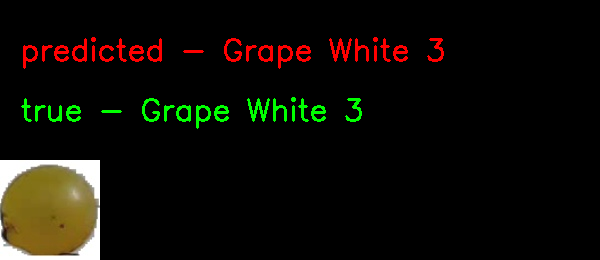

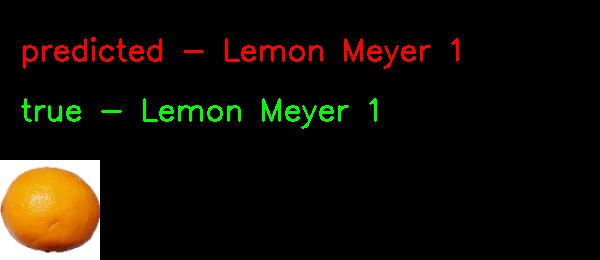

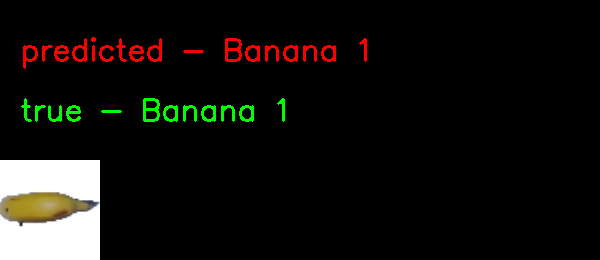

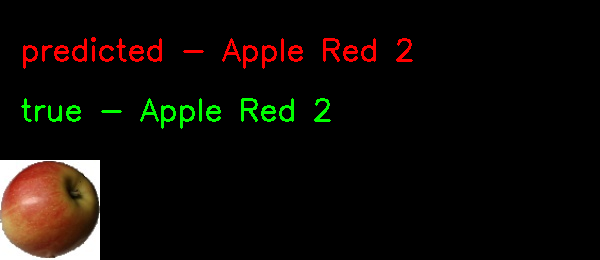

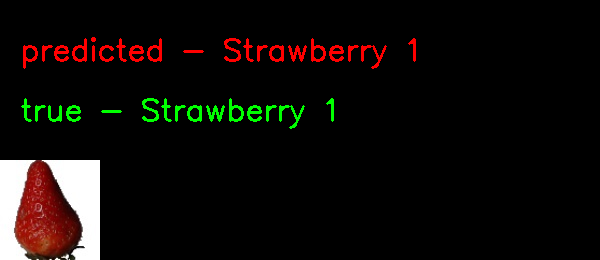

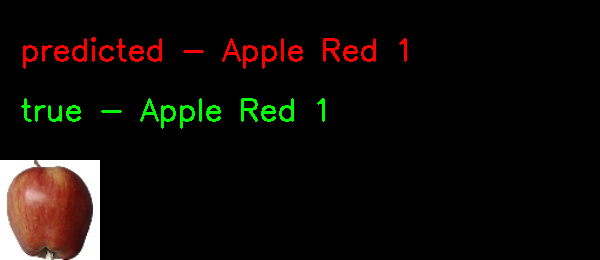

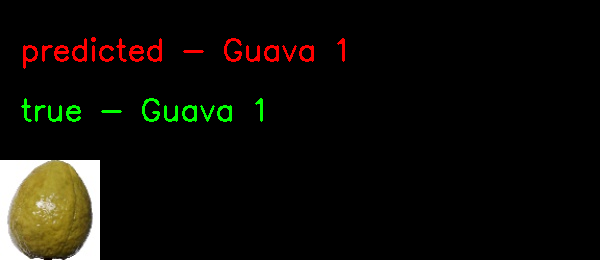

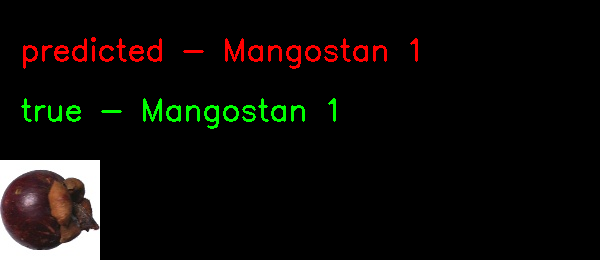

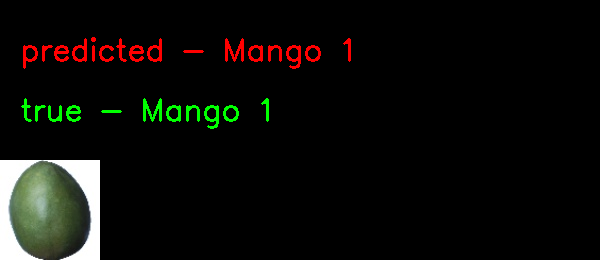

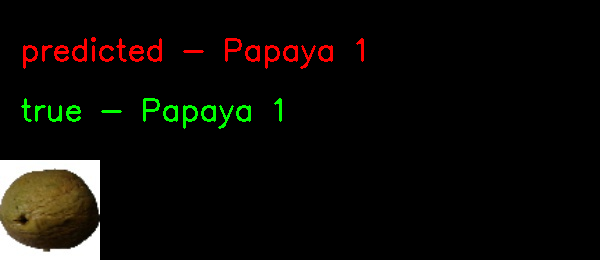

In [ ]:
import os
import numpy as np
import cv2
from keras.preprocessing import image
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab compatibility

def draw_test(name, pred, im, true_label):
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500, cv2.BORDER_CONSTANT, value=BLACK)
    cv2.putText(expanded_image, "predicted - " + pred, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(expanded_image, "true - " + true_label, (20, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(expanded_image)  # Display the image in Colab

def getRandomImage(path, img_width, img_height):
    """Function loads a random image from a random folder in our test path."""
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = os.path.join(path, path_class)
    file_names = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = os.path.join(file_path, image_name)
    return image.load_img(final_path, target_size=(img_width, img_height)), final_path, path_class

# Dimensions of images
img_width, img_height = 32, 32
path = '/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/Test'

# Initialize lists
files = []
predictions = []
true_labels = []

# Make predictions using the trained model
for i in range(0, 10):
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1.0 / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = np.argmax(model.predict(images), axis=-1)  # Use the model already in memory
    predictions.append(classes)

# Map predictions to class labels and display results
for i in range(0, len(files)):
    img = cv2.imread(files[i])
    draw_test("Prediction", class_labels[predictions[i][0]], img, true_labels[i])




Training and Validation Accuracy per Epoch:
Epoch 1: Training Accuracy = 0.3556, Validation Accuracy = 0.6411
Epoch 2: Training Accuracy = 0.7179, Validation Accuracy = 0.8661
Epoch 3: Training Accuracy = 0.8000, Validation Accuracy = 0.8709
Epoch 4: Training Accuracy = 0.8416, Validation Accuracy = 0.7486
Epoch 5: Training Accuracy = 0.8592, Validation Accuracy = 0.9041
Epoch 6: Training Accuracy = 0.8736, Validation Accuracy = 0.9045
Epoch 7: Training Accuracy = 0.8778, Validation Accuracy = 0.8917
Epoch 8: Training Accuracy = 0.8783, Validation Accuracy = 0.8470
Epoch 9: Training Accuracy = 0.8811, Validation Accuracy = 0.8800
Epoch 10: Training Accuracy = 0.8815, Validation Accuracy = 0.9227
Epoch 11: Training Accuracy = 0.9528, Validation Accuracy = 0.9511
Epoch 12: Training Accuracy = 0.9565, Validation Accuracy = 0.9720


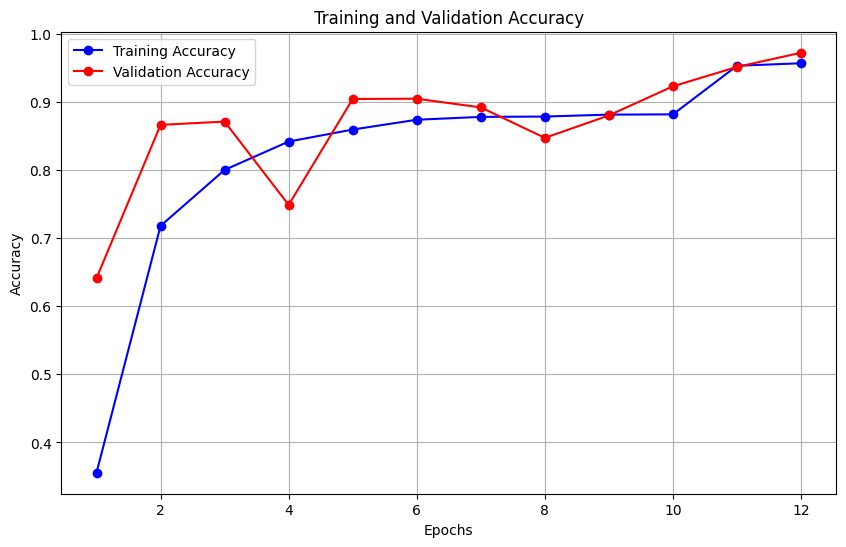

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
def plot_training_history(history):
    # Extract accuracy and validation accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    # Print accuracy values
    print("\nTraining and Validation Accuracy per Epoch:")
    for epoch, (a, va) in enumerate(zip(acc, val_acc), 1):
        print(f"Epoch {epoch}: Training Accuracy = {a:.4f}, Validation Accuracy = {va:.4f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Visualize the results
plot_training_history(history)